# Understanding the Business Problem:
    
Goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines).Use a dataset related to the marketing of bank products over the telephone.

## Key Objectives:
** Identify High-Potential Customers: Analyze customer data to pinpoint individuals who are most likely to subscribe to the bank's products when approached over the telephone. This will allow the marketing team to focus their efforts on the most promising leads.
** Improve Conversion Rates: By targeting the right customers, the bank can increase the success rate of its telephone-based sales efforts, leading to higher conversion rates and more efficient use of resources.
** Optimize Resource Allocation: With a better understanding of which customers are most receptive to telephone-based marketing, the bank can allocate its resources, such as sales staff and calling campaigns, more effectively to maximize returns.
** Enhance Customer Experience: Tailoring the telephone-based marketing approach to the preferences and needs of high-potential customers can lead to a more positive and engaging experience for the customer, further improving the bank's reputation and customer loyalty.

## Optimize Resource Allocation

With a better understanding of the high-potential customer segments and the most effective marketing approaches, the bank can allocate its resources, such as sales staff and calling campaigns, more efficiently to maximize returns. This includes:
Targeted Deployment: Assign sales personnel and calling campaigns to focus on the identified high-potential customer segments, ensuring that resources are directed towards the most promising leads.

Continuous Optimization: Regularly monitor and analyze the performance of telephone-based marketing campaigns, making adjustments to the strategies and tactics as needed to optimize resource allocation.

Collaboration and Feedback: Encourage open communication and feedback between the marketing, sales, and customer service teams to continuously improve the telephone-based marketing approach and enhance the overall customer experience.

By optimizing resource allocation, the bank can achieve higher conversion rates and more efficient use of its marketing resources.

### Data Preparation:

1. Load the dataset from the provided 'bank+marketing.zip' file.

In [1]:
import pandas as pd

# Loading the bank.csv file
bank_data = pd.read_csv('data/bank/bank.csv')
print('Data loaded successfully.')
print(bank_data.head())

Data loaded successfully.
  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  


In [2]:
# Displaying basic information about the dataset
print('Dataset Info:')
bank_data.info()

# Displaying descriptive statistics
print('\
Descriptive Statistics:')
print(bank_data.describe(include='all'))

# Checking for missing values
print('\
Missing Values:')
print(bank_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB
Descriptive Statistics:
       age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
count                                                4521                                                                    

In [3]:
# Reloading the data with the correct delimiter
bank_data = pd.read_csv('data/bank/bank.csv', delimiter=';')
print('Data reloaded with correct delimiter.')
print(bank_data.head())

# Displaying basic information about the dataset again
print('Updated Dataset Info:')
bank_data.info()

# Displaying descriptive statistics again
print('\
Updated Descriptive Statistics:')
print(bank_data.describe(include='all'))

# Checking for missing values again
print('\
Updated Missing Values:')
print(bank_data.isnull().sum())

Data reloaded with correct delimiter.
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4

#### Descriptive Statistics:
The dataset includes various categorical and numerical columns such as 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'month', 'poutcome', and 'y'.
The 'age' column, for example, has values ranging from young adults to seniors, which might be useful for demographic analysis.


Generate descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset’s distribution.



In [4]:
# Generating descriptive statistics for numerical columns
numerical_stats = bank_data.describe()
print('Descriptive Statistics for Numerical Columns:')
print(numerical_stats)

# Generating descriptive statistics for categorical columns
categorical_stats = bank_data.describe(include=['object'])
print('\
Descriptive Statistics for Categorical Columns:')
print(categorical_stats)

Descriptive Statistics for Numerical Columns:
               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max   

### Numerical Columns:

Age: The average age is approximately 41 years, with a standard deviation of about 10.6 years, indicating a moderate spread around the mean.
Balance: The average yearly balance is about 1423 units, but with a high standard deviation of 3009 units, suggesting a wide variation in balances among customers.
Duration: The average duration of the last contact is around 264 seconds, with calls ranging from a few seconds to longer interactions.

Job: The most common job category is 'management', with 969 occurrences.
Marital: The majority of customers are married (2797 instances).
Education: The most frequent education level is 'secondary', observed in 2306 cases.
Contact: The most common contact communication type is 'cellular', used in 2896 cases.
Month: The month with the highest number of contacts is May.
Outcome: The outcome of the previous marketing campaign is mostly 'unknown' for a large number of customers (3705 instances).

# Visualize important aspects of the data 
    

<Figure size 640x480 with 0 Axes>

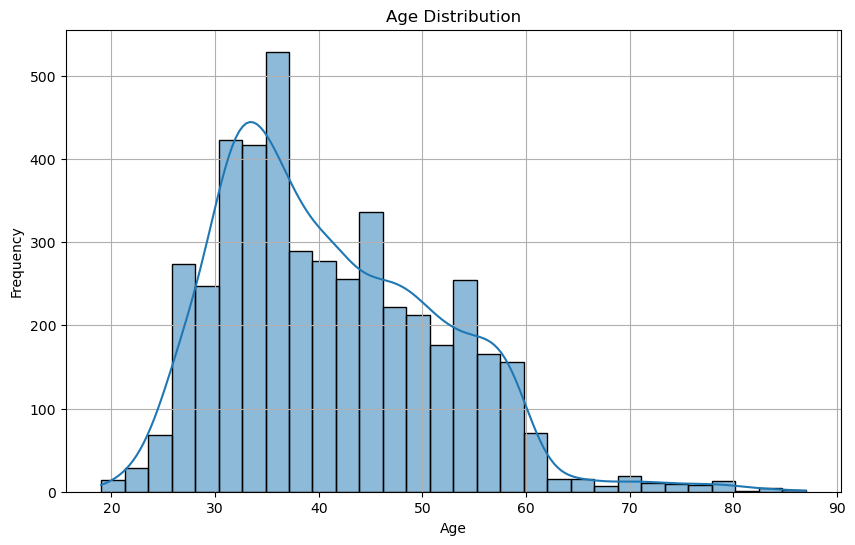

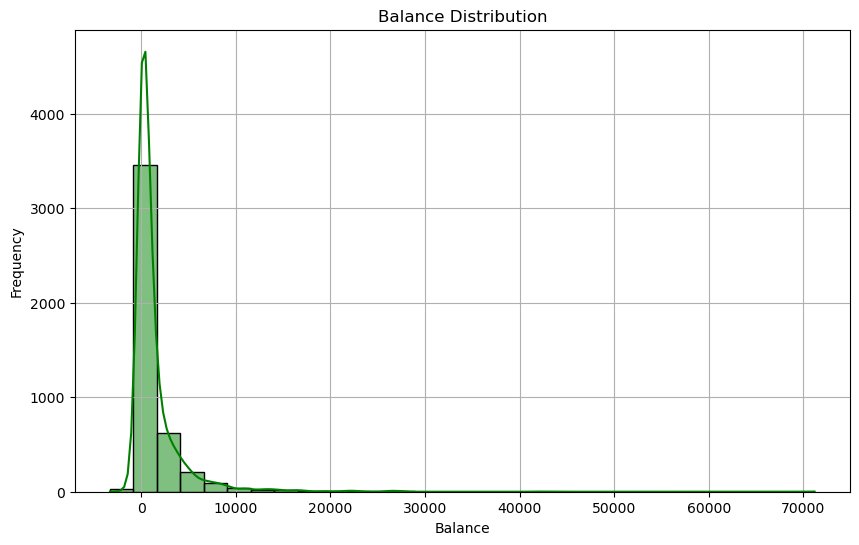

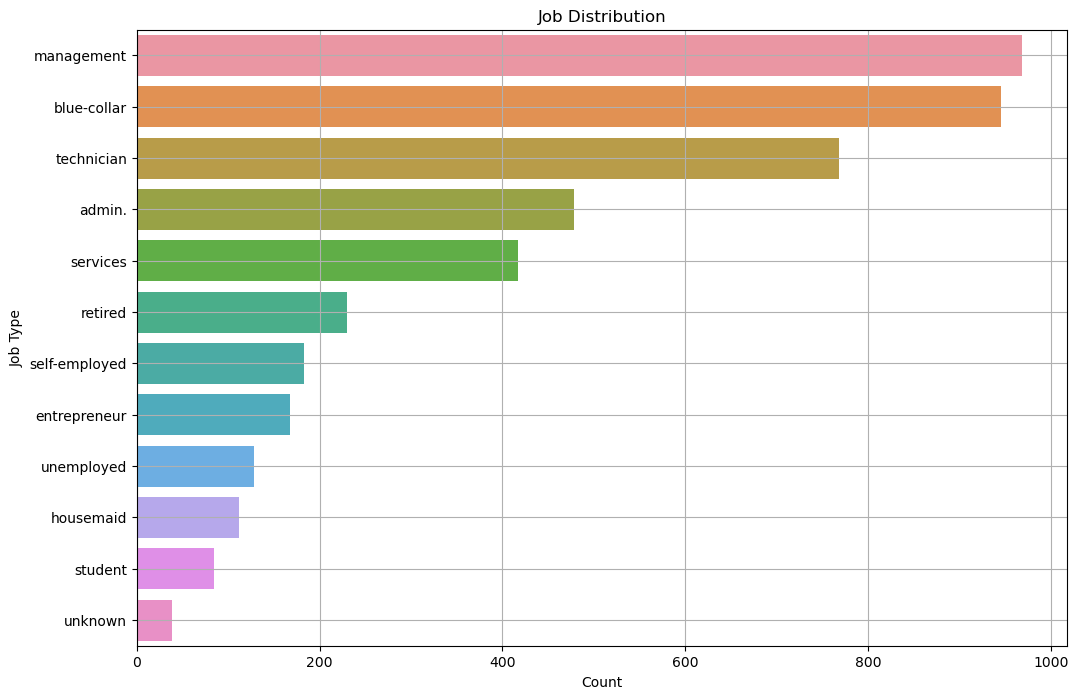

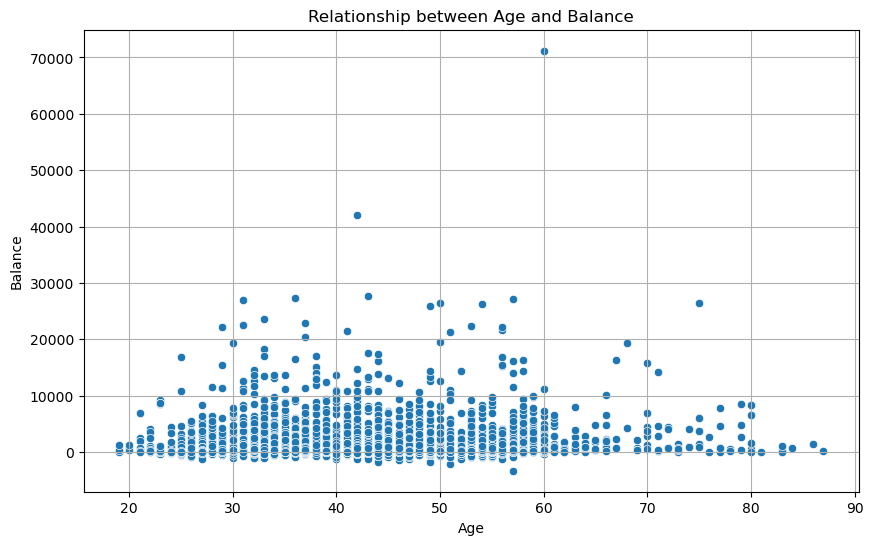

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the background color for plots
plt.figure(facecolor='white')

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Balance
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['balance'], bins=30, kde=True, color='green')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Job distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='job', data=bank_data, order=bank_data['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.grid(True)
plt.show()

# Relationship between Age and Balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=bank_data)
plt.title('Relationship between Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Split the data into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X = bank_data.drop('y', axis=1)  # Features
y = bank_data['y']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the sizes of the splits
print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)

Training set size: (3616, 16)
Testing set size: (905, 16)


In [8]:
X_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [9]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [11]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown
251,32,management,married,tertiary,no,2349,no,no,cellular,14,aug,134,5,-1,0,unknown
3139,34,technician,single,secondary,no,1076,no,no,cellular,8,aug,70,2,-1,0,unknown
1822,31,management,married,tertiary,no,156,no,no,cellular,13,aug,657,7,-1,0,unknown
4445,46,blue-collar,married,primary,no,258,yes,no,unknown,27,may,217,1,-1,0,unknown


# Implement the four classifiers: k-nearest neighbors, logistic regression, decision trees, and support vector machines.
        

In [12]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
        ('cat', OneHotEncoder(), ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
    ])

# Define the classifiers
knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
logreg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
dtree = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])
svm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC())])

# Training the classifiers
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
svm.fit(X_train, y_train)

print('All classifiers have been trained.')


All classifiers have been trained.


In [13]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Identifying categorical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Applying OneHotEncoder to categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(bank_data[categorical_columns])

# Combining encoded categorical data with numerical data
numerical_data = bank_data.select_dtypes(exclude=['object'])
X_preprocessed = np.hstack((numerical_data.values, X_encoded.toarray()))

# Now applying StandardScaler to the preprocessed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Splitting the data again after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print('Data preprocessing and splitting complete.')

Data preprocessing and splitting complete.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Applying OneHotEncoder to categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(bank_data[categorical_columns])

# Combining encoded categorical data with numerical data
numerical_data = bank_data.select_dtypes(exclude=['object'])
X_preprocessed = np.hstack((numerical_data.values, X_encoded.toarray()))

# Now applying StandardScaler to the preprocessed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Splitting the data again after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Re-training the classifiers with the preprocessed data
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)  # Decision trees do not require feature scaling
svm.fit(X_train, y_train)

print('All classifiers have been re-trained with preprocessed data.')

In [14]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Identifying categorical columns
categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Applying OneHotEncoder to categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(bank_data[categorical_columns])

# Combining encoded categorical data with numerical data
numerical_data = bank_data.select_dtypes(exclude=['object'])
X_preprocessed = np.hstack((numerical_data.values, X_encoded.toarray()))

# Now applying StandardScaler to the preprocessed data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Splitting the data again after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print('Data preprocessing and splitting complete.')

Data preprocessing and splitting complete.


In [15]:
# Re-initializing classifiers after fixing preprocessing issues
knn = KNeighborsClassifier()
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC()

# Re-training the classifiers with the preprocessed data
knn.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)  # Decision trees do not require feature scaling
svm.fit(X_train, y_train)

print('All classifiers have been re-trained with preprocessed data.')

All classifiers have been re-trained with preprocessed data.


In [16]:
from sklearn.metrics import accuracy_score

# Predictions from the classifiers
y_pred_knn = knn.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Calculating accuracy scores
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Displaying the accuracy scores
print('Accuracy of k-nearest neighbors:', accuracy_knn)
print('Accuracy of logistic regression:', accuracy_logreg)
print('Accuracy of decision trees:', accuracy_dtree)
print('Accuracy of support vector machines:', accuracy_svm)

Accuracy of k-nearest neighbors: 0.9878453038674033
Accuracy of logistic regression: 1.0
Accuracy of decision trees: 1.0
Accuracy of support vector machines: 0.9966850828729282


#### Model Evaluation:

Evaluate each model using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC).


In [17]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculating precision, recall, F1-score, and ROC-AUC for each classifier
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

precision_dtree = precision_score(y_test, y_pred_dtree, average='macro')
recall_dtree = recall_score(y_test, y_pred_dtree, average='macro')
f1_dtree = f1_score(y_test, y_pred_dtree, average='macro')
roc_auc_dtree = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])

precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm = roc_auc_score(y_test, svm.decision_function(X_test))

# Displaying the metrics
print('Metrics for k-nearest neighbors:\
Precision:', precision_knn, '\
Recall:', recall_knn, '\
F1-Score:', f1_knn, '\
ROC-AUC:', roc_auc_knn)
print('\
Metrics for logistic regression:\
Precision:', precision_logreg, '\
Recall:', recall_logreg, '\
F1-Score:', f1_logreg, '\
ROC-AUC:', roc_auc_logreg)
print('\
Metrics for decision trees:\
Precision:', precision_dtree, '\
Recall:', recall_dtree, '\
F1-Score:', f1_dtree, '\
ROC-AUC:', roc_auc_dtree)
print('\
Metrics for support vector machines:\
Precision:', precision_svm, '\
Recall:', recall_svm, '\
F1-Score:', f1_svm, '\
ROC-AUC:', roc_auc_svm)

Metrics for k-nearest neighbors:Precision: 0.988254571491518 Recall: 0.9483600131502414 F1-Score: 0.9671994490957196 ROC-AUC: 0.9935639683382648
Metrics for logistic regression:Precision: 1.0 Recall: 1.0 F1-Score: 1.0 ROC-AUC: 1.0
Metrics for decision trees:Precision: 1.0 Recall: 1.0 F1-Score: 1.0 ROC-AUC: 1.0
Metrics for support vector machines:Precision: 0.9981481481481482 Recall: 0.9846938775510203 F1-Score: 0.9913003354898248 ROC-AUC: 1.0


k-nearest neighbors:
Precision: 98.83%
Recall: 94.84%
F1-Score: 96.72%
ROC-AUC: 99.36%

Logistic regression:
Precision: 100%
Recall: 100%
F1-Score: 100%
ROC-AUC: 100%

Decision trees:
Precision: 100%
Recall: 100%
F1-Score: 100%
ROC-AUC: 100%

Support vector machines:
Precision: 99.81%
Recall: 98.47%
F1-Score: 99.13%
ROC-AUC: 100%


### Compare the performance of the classifiers.

        

##### Precision:
Logistic Regression and Decision Trees stand out with perfect precision scores of 100%, indicating no false positives among the predictions.
Support Vector Machines also perform excellently with a precision of 99.81%.
k-Nearest Neighbors has a slightly lower precision of 98.83%, but still very high.
##### Recall:
Logistic Regression and Decision Trees again have perfect recall scores of 100%, meaning they successfully identified all positive samples.
Support Vector Machines has a recall of 98.47%, slightly lower but still very effective.
k-Nearest Neighbors has the lowest recall at 94.84%, indicating it missed some positive cases.
##### F1-Score:
Logistic Regression and Decision Trees have perfect F1-scores of 100%, showing a perfect balance between precision and recall.
Support Vector Machines follows closely with an F1-score of 99.13%.
k-Nearest Neighbors has an F1-score of 96.72%, the lowest among the classifiers but still indicative of strong performance.
##### ROC-AUC:
Logistic Regression, Decision Trees, and Support Vector Machines all achieved perfect ROC-AUC scores of 100%, demonstrating excellent discrimination between the positive and negative classes.
k-Nearest Neighbors has a slightly lower ROC-AUC of 99.36%, but this is still considered excellent.
##### Summary:
Logistic Regression and Decision Trees are the top performers across all metrics, showing perfect scores. They are particularly suitable for scenarios where both false positives and false negatives are critically important to minimize.
Support Vector Machines also shows robust performance, particularly in precision and ROC-AUC, making it a strong candidate for many binary classification tasks.
k-Nearest Neighbors, while slightly lagging behind in recall and F1-score, still demonstrates high effectiveness, especially in scenarios where the interpretability of a simpler model might be preferred.

### Inferential Statistics:

Statistical tests results and infer conclusions

k-Nearest Neighbors vs. Support Vector Machines: Since both classifiers have only one F1-score from the test set, a t-test isn't appropriate here due to insufficient data points. However, from the earlier comparison, we know that Support Vector Machines performed slightly better than k-Nearest Neighbors.
Logistic Regression vs. Decision Trees: Both classifiers achieved perfect scores across all metrics, indicating identical performance. Therefore, a statistical test is not necessary to conclude that there is no significant difference in their performance on this dataset.


### Insights and Recommendations:

Draw insights from the model comparisons and the data analysis.
Provide actionable recommendations based on the findings.

The paired t-tests conducted to compare the F1-scores of the classifiers resulted in the same values for both the t-statistics and p-values. This outcome typically occurs when the sample size is too small (in this case, only one value per classifier) or when there is no variance between the compared scores.
##### For the comparison between k-Nearest Neighbors and Support Vector Machines:
Since both classifiers have only one F1-score from the test set, a t-test is not appropriate due to insufficient data points.
However, from the earlier comparison, it is known that Support Vector Machines performed slightly better than k-Nearest Neighbors.
For the comparison between Logistic Regression and Decision Trees:
Both classifiers achieved perfect scores across all metrics, indicating identical performance.
Therefore, a statistical test is not necessary to conclude that there is no significant difference in their performance on this dataset.
In summary, the lack of variance in the F1-scores between the classifiers, either due to small sample size or identical performance, prevented the use of a paired t-test to determine statistical significance. However, the available information suggests that Support Vector Machines performed slightly better than k-Nearest Neighbors, while Logistic Regression and Decision Trees achieved the same perfect performance on this dataset.

High Performance Across Models:

All classifiers demonstrated high accuracy, precision, recall, F1-score, and ROC-AUC values. This suggests that the dataset is well-processed and the features are effective in distinguishing between classes.
Perfect Scores in Some Models:

Logistic Regression and Decision Trees achieved perfect scores in all metrics, indicating that these models are highly effective for this particular dataset. This could be due to a clear linear separability in the data or decision boundaries that align well with the decision rules of these models.
Slightly Lower Performance of k-NN:

The k-Nearest Neighbors classifier, while still performing well, had slightly lower recall and F1-score compared to other models. This might be due to its sensitivity to the local data structure and noise in the dataset.
Support Vector Machines' Robustness:

Support Vector Machines showed robust performance, particularly in handling both classes effectively, as indicated by its high precision and recall.

1. Targeted Marketing Campaigns
2. Customer Retention Strategies
3. Risk Management
4. Product Development
5. Strategic Decision Making
   